In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

In [3]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = \
                    imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\Anaconda\envs\ML2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda\envs\ML2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [7]:
# 모델 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                

In [8]:
# 컴파일
model.compile(loss='binary_crossentropy', \
             optimizer='adam', \
             metrics=['accuracy'])

In [9]:
# 훈련
history = model.fit(x_train, y_train, batch_size=100, \
                   epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 18s 66ms/step - loss: 0.4503 - accuracy: 0.7698 - val_loss: 0.3389 - val_accuracy: 0.8535
Epoch 2/5
250/250 [==============================] - 15s 58ms/step - loss: 0.2919 - accuracy: 0.8770 - val_loss: 0.3300 - val_accuracy: 0.8536
Epoch 3/5
250/250 [==============================] - 14s 57ms/step - loss: 0.2503 - accuracy: 0.9006 - val_loss: 0.3310 - val_accuracy: 0.8568
Epoch 4/5
250/250 [==============================] - 14s 56ms/step - loss: 0.2162 - accuracy: 0.9132 - val_loss: 0.3453 - val_accuracy: 0.8536
Epoch 5/5
250/250 [==============================] - 14s 57ms/step - loss: 0.1840 - accuracy: 0.9308 - val_loss: 0.3499 - val_accuracy: 0.8542


In [10]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 5s 6ms/step - loss: 0.3499 - accuracy: 0.8542

 Test Accuracy: 0.8542


In [11]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

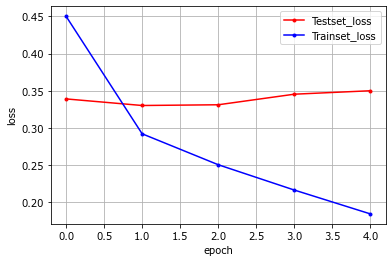

In [12]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()